In [2]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117

Looking in indexes: https://download.pytorch.org/whl/cu117


In [3]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [4]:
!cd yolov5 & pip install -r requirements.txt

     -------------------------------------- 616.3/616.3 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.131
    Uninstalling ultralytics-8.0.131:
      Successfully uninstalled ultralytics-8.0.131


In [5]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [6]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\chandan/.cache\torch\hub\ultralytics_yolov5_master
requirements: Ultralytics requirement ['ultralytics>=8.0.147'] not found, attempting AutoUpdate...

requirements: AutoUpdate success  5.3s, installed 1 package: ['ultralytics>=8.0.147']
requirements:  Restart runtime or rerun command for updates to take effect

YOLOv5  2023-9-11 Python-3.10.9 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)

100%|█████████████████████████████████████████████████████████████████████████████| 14.1M/14.1M [00:03<00:00, 4.37MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [7]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [19]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [34]:
img="E:\SIH2\plant4.jpg"

In [35]:
results = model(img)
results.print()

image 1/1: 516x612 (no detections)
Speed: 27.3ms pre-process, 199.5ms inference, 3.5ms NMS per image at shape (1, 3, 544, 640)


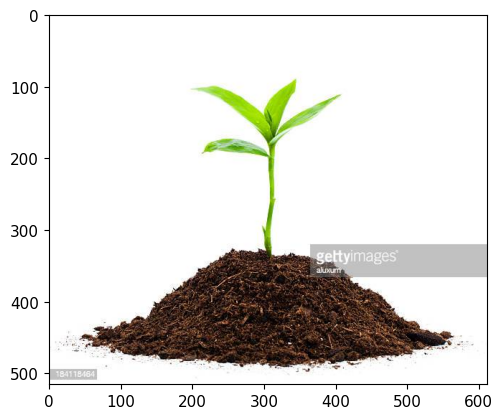

In [36]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()